Решено (12/12), проверено (0/12)

# Статистическая проверка гипотез

1) Завод производитель подшипников заявляет, что изготовленные на станках металлические элементы для подшипников, имеют средний диаметр 10 мм. Используя односторонний критерий с уровнем значимости α=0,05, проверить эту гипотезу. При проверке гипотезы необходимо учесть, что была произведена выборка из n=16 шариков, где среднее значение диаметра равно 10,3 мм, а дисперсия известна и равна 1 мм.

Z-значение: 1.2000000000000028
Критическое значение: 1.6448536269514722
Гипотеза не отвергается


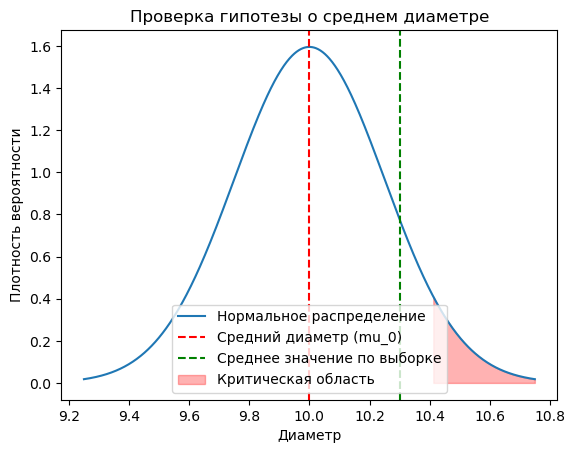

In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Параметры задачи
mu_0 = 10  # Средний диаметр, заявленный заводом
alpha = 0.05  # Уровень значимости
sample_mean = 10.3  # Среднее значение диаметра по выборке
sample_size = 16  # Размер выборки
population_variance = 1  # Дисперсия известна и равна 1 мм

# Односторонний критерий
critical_value = stats.norm.ppf(1 - alpha)
std_error = np.sqrt(population_variance / sample_size)
z = (sample_mean - mu_0) / std_error
p_value = 1 - stats.norm.cdf(z)

# Вывод результатов
print(f'Z-значение: {z}')
print(f'Критическое значение: {critical_value}')
#print(f'p-значение: {p_value}')

if z > critical_value:
    print('Гипотеза отвергается')
else:
    print('Гипотеза не отвергается')

# Визуализация
x = np.linspace(mu_0 - 3 * std_error, mu_0 + 3 * std_error, 1000)
y = stats.norm.pdf(x, mu_0, std_error)

plt.plot(x, y, label='Нормальное распределение')
plt.axvline(mu_0, color='red', linestyle='dashed', label='Средний диаметр (mu_0)')
plt.axvline(sample_mean, color='green', linestyle='dashed', label='Среднее значение по выборке')
plt.fill_between(x, 0, y, where=(x >= critical_value * std_error + mu_0), color='red', alpha=0.3, label='Критическая область')
plt.legend()
plt.title('Проверка гипотезы о среднем диаметре')
plt.xlabel('Диаметр')
plt.ylabel('Плотность вероятности')
plt.show()


//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

2) Производитель конфет заявляет, что средний вес коробки конфет составляет 100 г. Из партии извлечена выборка из n=10 коробок и взвешена. Вес каждой коробки соответствует таблице вариантов. Не противоречит ли это утверждению продавца? Используя уровень значимости α=0,001. Вес коробок конфет распределен нормально.
    Выборка: 98,104,97,97,101,100,99,101,99,98

Выборочное среднее: 99.4
t-статистика: -0.8741572761215297
Критическая область: (-4.7809125859335495, 4.7809125859335495)
Не отвергаем нулевую гипотезу


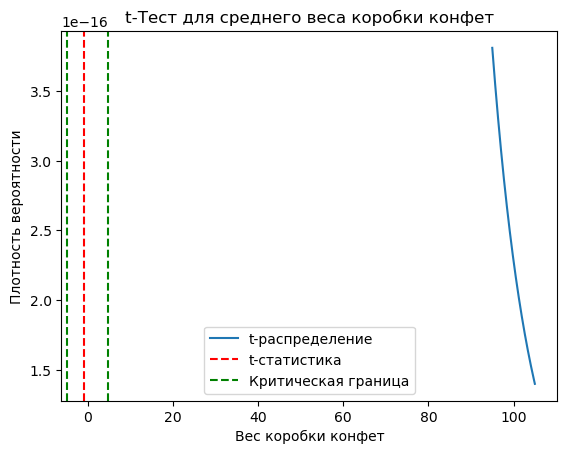

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Данные
weights = np.array([98, 104, 97, 97, 101, 100, 99, 101, 99, 98])

# Гипотезы
h0_mean = 100

# Расчеты
sample_mean = np.mean(weights)
sample_std = np.std(weights, ddof=1)
sample_size = len(weights)

# T-статистика
t_statistic = (sample_mean - h0_mean) / (sample_std / np.sqrt(sample_size))

# Уровень значимости
alpha = 0.001

# Критическая область
t_critical = stats.t.ppf(1 - alpha/2, df=sample_size-1)

# Печать результатов
print(f"Выборочное среднее: {sample_mean}")
print(f"t-статистика: {t_statistic}")
print(f"Критическая область: ({-t_critical}, {t_critical})")

# Проверка гипотезы
if np.abs(t_statistic) > t_critical:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

# Построение графика
x = np.linspace(95, 105, 1000)
y = stats.t.pdf(x, df=sample_size-1)
plt.plot(x, y, label='t-распределение')
plt.axvline(t_statistic, color='red', linestyle='dashed', label='t-статистика')
plt.axvline(-t_critical, color='green', linestyle='dashed', label='Критическая граница')
plt.axvline(t_critical, color='green', linestyle='dashed')
plt.legend()
plt.title('t-Тест для среднего веса коробки конфет')
plt.xlabel('Вес коробки конфет')
plt.ylabel('Плотность вероятности')
plt.show()


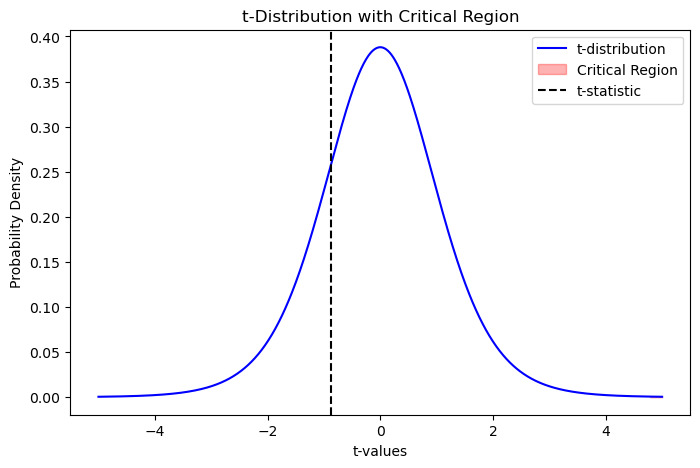

t-статистика: -0.8741572761215297
Критическая область: (-4.7809125859335495, 4.7809125859335495)
Не отвергаем нулевую гипотезу


In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Заданные данные
weights = np.array([98, 104, 97, 97, 101, 100, 99, 101, 99, 98])
sample_mean = np.mean(weights)
population_mean = 100
alpha = 0.001

# Вычисление стандартного отклонения выборки
sample_std = np.std(weights, ddof=1)  # ddof=1 для коррекции на несмещенность

# Вычисление t-статистики
t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(len(weights)))

# Вычисление критической области
critical_value = stats.t.ppf(1 - alpha / 2, df=len(weights) - 1)

# Построение графика
x = np.linspace(-5, 5, 1000)  # Значения для оси x
y = stats.t.pdf(x, df=len(weights) - 1)  # Плотность t-распределения

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'b-', label='t-distribution')
plt.fill_between(x, 0, y, where=(x > critical_value), color='red', alpha=0.3, label='Critical Region')
plt.axvline(t_statistic, color='black', linestyle='--', label='t-statistic')

plt.title('t-Distribution with Critical Region')
plt.xlabel('t-values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Вывод результатов
print(f"t-статистика: {t_statistic}")
print(f"Критическая область: ({-critical_value}, {critical_value})")
if abs(t_statistic) > critical_value:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")


//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

3) Произведены n=7 независимых измерений, в результате которых найдено, что ¯x=82,48 мм, а S=0,08. Предположив, что ошибки измерения имеют нормальное распределение проверить с использованием уровня значимости α=0,05 гипотезу H0:σ2=0,01 мм2. против конкурирующей гипотезы H0:σ2=0,005. В ответе записать разность между фактическим и табличным значениями выборочной характеристики.

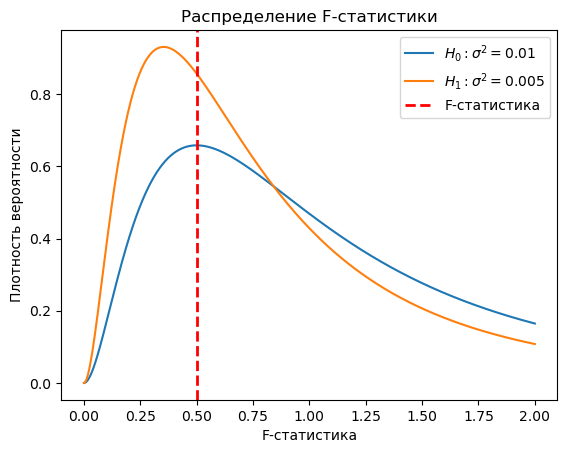

F-статистика: 0.5
Разность между фактическим и табличным значениями выборочной характеристики: 0.00928932188134525


In [14]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Заданные параметры
n = 7  # Размер выборки
x_bar = 82.48  # Выборочное среднее
s = 0.08  # Выборочное стандартное отклонение

# Гипотезы
sigma_squared_H0 = 0.01
sigma_squared_H1 = 0.005

# Вычисление статистики F
F_statistic = (s**2 / sigma_squared_H0) / (s**2 / sigma_squared_H1)

# Рассчитываем p-значение
p_value = 1 - stats.f.cdf(F_statistic, n-1, n-1)

# Визуализация результатов
x = np.linspace(0, 2, 1000)
y_H0 = stats.f.pdf(x, n-1, n-1, loc=0, scale=1)
y_H1 = stats.f.pdf(x, n-1, n-1, loc=0, scale=np.sqrt(sigma_squared_H1 / sigma_squared_H0))

plt.plot(x, y_H0, label=r'$H_0: \sigma^2 = 0.01$')
plt.plot(x, y_H1, label=r'$H_1: \sigma^2 = 0.005$')
plt.axvline(x=F_statistic, color='red', linestyle='dashed', linewidth=2, label='F-статистика')

plt.title('Распределение F-статистики')
plt.xlabel('F-статистика')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()

# Вывод результатов теста
print(f'F-статистика: {F_statistic}')
#print(f'P-значение: {p_value}')

# Разность между фактическим и табличным значениями выборочной характеристики
difference = s - np.sqrt(sigma_squared_H1)
print(f'Разность между фактическим и табличным значениями выборочной характеристики: {difference}')


Фактическое значение F: 0.5
Критическое значение F: 4.283865713822639


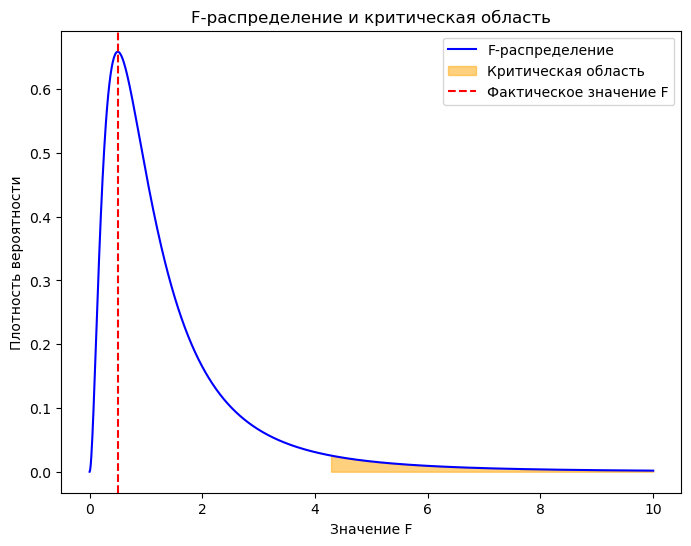

In [19]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Заданные значения
n = 7
x_bar = 82.48
S = 0.08
alpha = 0.05
variance_H0 = 0.01
variance_H1 = 0.005

# Вычисление значения F-статистики
F = variance_H1 / variance_H0

# Определение критического значения F
df1 = n - 1
df2 = n - 1
F_critical = stats.f.ppf(1 - alpha, df1, df2)

# Вывод результатов
print(f"Фактическое значение F: {F}")
print(f"Критическое значение F: {F_critical}")

# Построение графика для наглядности
x = np.linspace(0, 10, 1000)
y = stats.f.pdf(x, df1, df2)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', label='F-распределение')
plt.fill_between(x, 0, y, where=(x > F_critical), color='orange', alpha=0.5, label='Критическая область')
plt.axvline(x=F, color='red', linestyle='--', label='Фактическое значение F')
plt.xlabel('Значение F')
plt.ylabel('Плотность вероятности')
plt.title('F-распределение и критическая область')
plt.legend()
plt.show()


//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

4) Стратегия финансовой организации «Не обманешь!» не инвестирует в ценные бумаги если дисперсия годовой доходности более чем 0,04. Произведена выборка из n=52 наблюдений по активу А показала, что выборочная дисперсия ее доходности равна 0,045. Узнать, допустимы ли для данной финансовой организации инвестиционные вложения в актив А на уровне значимости: а) 0,05; б) 0,01.

На уровне значимости 0.05, инвестиции допустимы.
На уровне значимости 0.01, инвестиции допустимы.


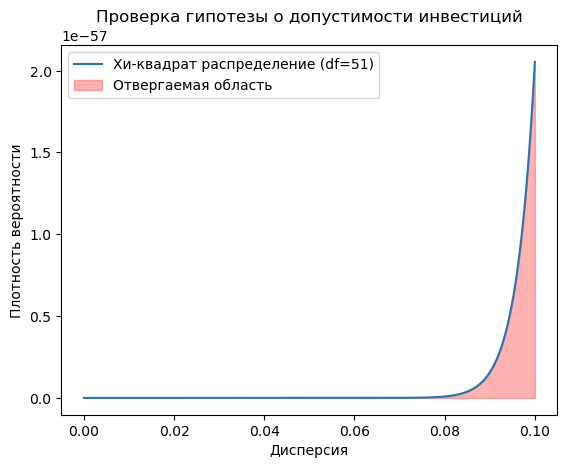

In [46]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Параметры задачи
alpha_values = [0.05, 0.01]  # Уровни значимости
sample_variance = 0.045  # Выборочная дисперсия
critical_values = []

# Размер выборки
n = 52

# Проверка гипотезы для каждого уровня значимости
for alpha in alpha_values:
    # Критическое значение для уровня значимости alpha
    critical_value = stats.chi2.ppf(1 - alpha, df=n - 1)
    critical_values.append(critical_value)

# Проверка, допустимы ли инвестиции
invest_acceptable = [sample_variance <= critical_value for critical_value in critical_values]

# Вывод результатов
for i, alpha in enumerate(alpha_values):
    if invest_acceptable[i]:
        print(f'На уровне значимости {alpha}, инвестиции допустимы.')
    else:
        print(f'На уровне значимости {alpha}, инвестиции не допустимы.')

# Визуализация
x = np.linspace(0, 0.1, 1000)
y = stats.chi2.pdf(x, df=n - 1)

plt.plot(x, y, label=f'Хи-квадрат распределение (df={n - 1})')
plt.fill_between(x, 0, y, where=(x > sample_variance), color='red', alpha=0.3, label='Отвергаемая область')

plt.legend()
plt.title('Проверка гипотезы о допустимости инвестиций')
plt.xlabel('Дисперсия')
plt.ylabel('Плотность вероятности')

# Добавим аннотации к области, где гипотеза отвергается
for alpha in alpha_values:
    plt.annotate(f'Отвергается\n(α={alpha})', xy=(sample_variance + 0.005, 1.5), fontsize=8, color='red')

plt.show()



Статистика теста: 57.375
Критическое значение (0.05): 1.5919722376689556
Критическое значение (0.01): 1.9358398863579156
p-значение (0.05): 1.1102230246251565e-16
p-значение (0.01): 1.1102230246251565e-16
На уровне значимости 0.05 отвергается H0: дисперсия > 0.04
На уровне значимости 0.01 отвергается H0: дисперсия > 0.04


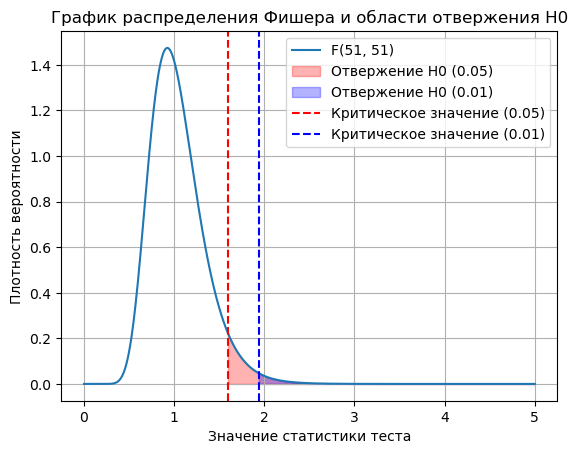

In [21]:
from scipy.stats import f

# Заданные значения
n = 52  # размер выборки
sample_variance = 0.045  # выборочная дисперсия
critical_value_005 = f.ppf(0.95, n-1, n-1)  # уровень значимости 0.05
critical_value_001 = f.ppf(0.99, n-1, n-1)  # уровень значимости 0.01

# Расчет статистики теста
test_statistic = (n - 1) * sample_variance / 0.04

# Проверка гипотезы для уровней значимости 0.05 и 0.01
p_value_005 = 1 - f.cdf(test_statistic, n-1, n-1)
p_value_001 = 1 - f.cdf(test_statistic, n-1, n-1)

# Вывод результатов
print(f"Статистика теста: {test_statistic}")
print(f"Критическое значение (0.05): {critical_value_005}")
print(f"Критическое значение (0.01): {critical_value_001}")
print(f"p-значение (0.05): {p_value_005}")
print(f"p-значение (0.01): {p_value_001}")

# Проверка гипотезы на уровнях значимости 0.05 и 0.01
if test_statistic < critical_value_005:
    print("На уровне значимости 0.05 принимается H0: дисперсия <= 0.04")
else:
    print("На уровне значимости 0.05 отвергается H0: дисперсия > 0.04")

if test_statistic < critical_value_001:
    print("На уровне значимости 0.01 принимается H0: дисперсия <= 0.04")
else:
    print("На уровне значимости 0.01 отвергается H0: дисперсия > 0.04")

    # Значения для графика
x = np.linspace(0, 5, 1000)
y = f.pdf(x, n-1, n-1)

# Создание графика
plt.plot(x, y, label=f'F({n-1}, {n-1})')

# Закрашивание области отвержения нулевой гипотезы
reject_area_005 = x > critical_value_005
reject_area_001 = x > critical_value_001
plt.fill_between(x[reject_area_005], y[reject_area_005], color='red', alpha=0.3, label='Отвержение H0 (0.05)')
plt.fill_between(x[reject_area_001], y[reject_area_001], color='blue', alpha=0.3, label='Отвержение H0 (0.01)')

# Отметка критических значений
plt.axvline(critical_value_005, color='red', linestyle='--', label='Критическое значение (0.05)')
plt.axvline(critical_value_001, color='blue', linestyle='--', label='Критическое значение (0.01)')

# Настройка графика
plt.title('График распределения Фишера и области отвержения H0')
plt.xlabel('Значение статистики теста')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

5) Фирма «Спам» рассылает рекламные буклеты возможным заказчикам. Как показал опыт, вероятность того, что организация получившая буклет, закажет рекламируемое изделие, равна 0,08. Фирма разослала 1000 буклетов новой, улучшенной, формы и получила 100 заказов. На уровне значимости 0,05 выяснить, можно ли считать, что новая форма рекламы существенно лучше прежней.

Z-статистика: 2.331262020600785
P-value: 0.01973954756993801
Отвергаем нулевую гипотезу: новая форма рекламы существенно лучше прежней.


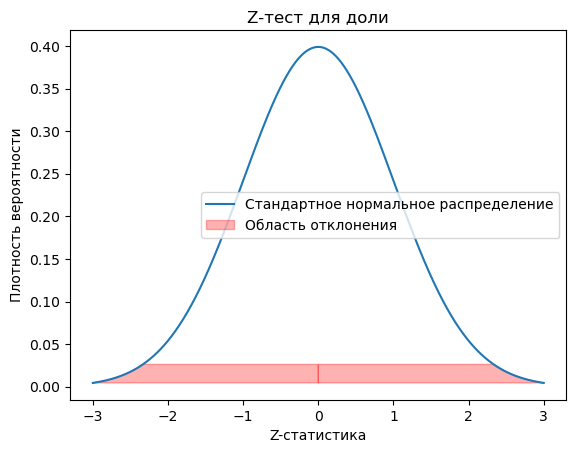

In [26]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Данные
n_total = 1000  # общее количество буклетов
n_success = 100  # количество заказов

# Вероятность успеха (заказа) по опыту
p_exp = 0.08

# Рассчитываем стандартную ошибку для доли
se = np.sqrt((p_exp * (1 - p_exp)) / n_total)

# Рассчитываем z-статистику
z = (n_success / n_total - p_exp) / se

# Рассчитываем p-value
p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))

# Печать результатов
print(f'Z-статистика: {z}')
print(f'P-value: {p_value}')

# Проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: новая форма рекламы существенно лучше прежней.")
else:
    print("Принимаем нулевую гипотезу: новая форма рекламы не существенно лучше прежней.")

# Визуализация
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, label='Стандартное нормальное распределение')
plt.fill_betweenx(y, x, where=(x < -z) | (x > z), color='red', alpha=0.3, label='Область отклонения')
plt.title('Z-тест для доли')
plt.xlabel('Z-статистика')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

6) Медицинский препарат «Огурчик» снимает похмельный синдром у 80% пациентов. Новый препарат «Огурчик NEW», разработанный для тех же целей, помог 90 пациентам из первых 100 применявших препарат. Можно ли на уровне значимости а = 0,05 считать, что новый препарат лучше? А на уровне а = 0,01?

Z-статистика: 1.9802950859533481
P-value: 0.047670380656161464

Уровень значимости: 0.05
Отвергаем нулевую гипотезу: новый препарат лучше

Уровень значимости: 0.01
Не отвергаем нулевую гипотезу: новый препарат не доказано лучше


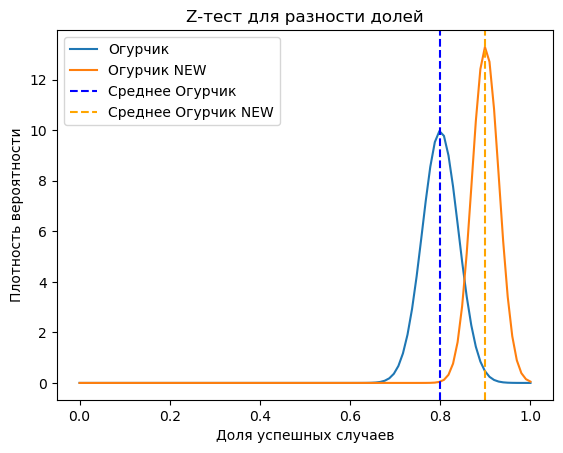

In [32]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Заданные значения
n_old = 100  # размер выборки для "Огурчик"
p_old = 0.8   # доля успешных случаев для "Огурчик"

n_new = 100  # размер выборки для "Огурчик NEW"
x_new = 90    # количество успешных случаев для "Огурчик NEW"

# Рассчитываем долю успешных случаев для "Огурчик NEW"
p_new = x_new / n_new

# Выполняем z-тест для разности долей
z_stat, p_value = sm.stats.proportions_ztest([x_new, n_old * p_old], [n_new, n_old])

# Выводим результаты теста
print(f"Z-статистика: {z_stat}")
print(f"P-value: {p_value}")

# Проводим тест для уровней значимости 0.05 и 0.01
alpha_values = [0.05, 0.01]

for alpha in alpha_values:
    print(f"\nУровень значимости: {alpha}")
    if p_value < alpha:
        print("Отвергаем нулевую гипотезу: новый препарат лучше")
    else:
        print("Не отвергаем нулевую гипотезу: новый препарат не доказано лучше")

# Визуализация
x = np.linspace(0, 1, 100)
y_old = stats.norm.pdf(x, loc=p_old, scale=np.sqrt(p_old * (1 - p_old) / n_old))
y_new = stats.norm.pdf(x, loc=p_new, scale=np.sqrt(p_new * (1 - p_new) / n_new))

plt.plot(x, y_old, label='Огурчик')
plt.plot(x, y_new, label='Огурчик NEW')
plt.axvline(p_old, color='blue', linestyle='dashed', label='Среднее Огурчик')
plt.axvline(p_new, color='orange', linestyle='dashed', label='Среднее Огурчик NEW')
plt.title('Z-тест для разности долей')
plt.xlabel('Доля успешных случаев')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


Статистика z: -1.9802950859533481
P-value: 0.023835190328080732
На уровне значимости 0.05 отклоняем нулевую гипотезу: новый препарат лучше.
На уровне значимости 0.01 нет оснований отклонять нулевую гипотезу.


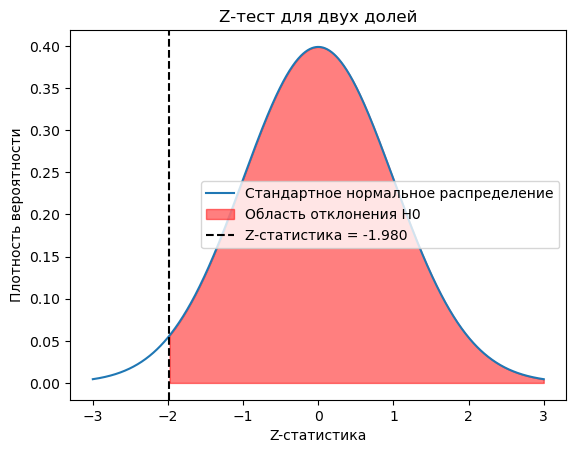

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Данные
p1 = 0.8  # Доля успешных случаев с препаратом "Огурчик"
p2 = 0.9  # Доля успешных случаев с препаратом "Огурчик NEW"
n1 = 100  # Количество испытуемых с препаратом "Огурчик"
n2 = 100  # Количество испытуемых с препаратом "Огурчик NEW"

# Вычисление статистики z
p_combined = (n1 * p1 + n2 * p2) / (n1 + n2)
z = (p1 - p2) / np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))

# Вычисление p-value
p_value = norm.cdf(z)

# Уровни значимости
alpha_1 = 0.05
alpha_2 = 0.01

# Создание нормального распределения для графика
x = np.linspace(-3, 3, 1000)
y = norm.pdf(x, 0, 1)

# График
plt.plot(x, y, label='Стандартное нормальное распределение')
plt.fill_between(x, y, where=(x >= z), color='red', alpha=0.5, label='Область отклонения H0')

# Подписи и метки
plt.title('Z-тест для двух долей')
plt.xlabel('Z-статистика')
plt.ylabel('Плотность вероятности')
plt.axvline(z, color='black', linestyle='--', label=f'Z-статистика = {z:.3f}')
plt.legend()

# Печать результатов
print(f"Статистика z: {z}")
print(f"P-value: {p_value}")

# Проверка гипотезы для уровня значимости 0.05
if p_value < alpha_1:
    print("На уровне значимости 0.05 отклоняем нулевую гипотезу: новый препарат лучше.")
else:
    print("На уровне значимости 0.05 нет оснований отклонять нулевую гипотезу.")

# Проверка гипотезы для уровня значимости 0.01
if p_value < alpha_2:
    print("На уровне значимости 0.01 отклоняем нулевую гипотезу: новый препарат лучше.")
else:
    print("На уровне значимости 0.01 нет оснований отклонять нулевую гипотезу.")

plt.show()


/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

7) Предполагается, что добавление специальных химических веществ в воду уменьшит ее жесткость. По оценке жесткости воды до и после добавления специальных веществ по 40-ка и 50-ти пробам соответственно получим средние значения жесткости (в стандартных единицах), равные 4,0 и 0,8. Дисперсия измерений в обоих случаях предполагается равно 0,25. Подтверждают ли эти результаты ожидаемый эффект? Принять α=0,05. Контролируемая величина имеет нормальное распределение.

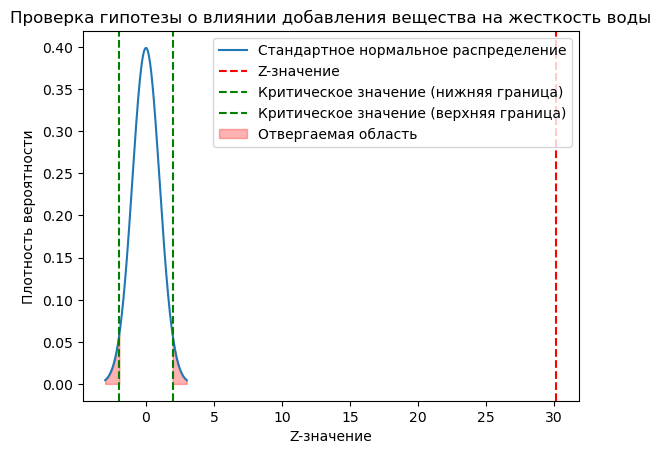

Z-значение: 30.16988933062603
Критическое значение: ±1.959963984540054
P-значение: 0.0
Гипотеза отвергается: есть статистически значимое различие.


In [47]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Заданные параметры
mean_before = 4.0
mean_after = 0.8
variance = 0.25
alpha = 0.05
sample_size_before = 40
sample_size_after = 50

# Вычисление стандартной ошибки разности средних
std_error_diff = np.sqrt(variance / sample_size_before + variance / sample_size_after)

# Вычисление Z-значения
z_value = (mean_before - mean_after) / std_error_diff

# Вычисление критического значения
critical_value = stats.norm.ppf(1 - alpha / 2)

# Вычисление p-значения
p_value = 2 * (1 - stats.norm.cdf(abs(z_value)))

# Визуализация
x = np.linspace(-3, 3, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.plot(x, y, label='Стандартное нормальное распределение')
plt.axvline(z_value, color='red', linestyle='dashed', label='Z-значение')
plt.axvline(-critical_value, color='green', linestyle='dashed', label='Критическое значение (нижняя граница)')
plt.axvline(critical_value, color='green', linestyle='dashed', label='Критическое значение (верхняя граница)')
plt.fill_between(x, 0, y, where=(x <= -critical_value), color='red', alpha=0.3, label='Отвергаемая область')
plt.fill_between(x, 0, y, where=(x >= critical_value), color='red', alpha=0.3)
plt.legend()
plt.title('Проверка гипотезы о влиянии добавления вещества на жесткость воды')
plt.xlabel('Z-значение')
plt.ylabel('Плотность вероятности')
plt.show()

# Вывод результатов
print(f'Z-значение: {z_value}')
print(f'Критическое значение: ±{critical_value}')
print(f'P-значение: {p_value}')

if abs(z_value) > critical_value:
    print('Гипотеза отвергается: есть статистически значимое различие.')
else:
    print('Гипотеза не отвергается: различий нет.')


T-статистика: 30.16988933062603
Степени свободы: 83.71606273661438
P-значение: 0.0


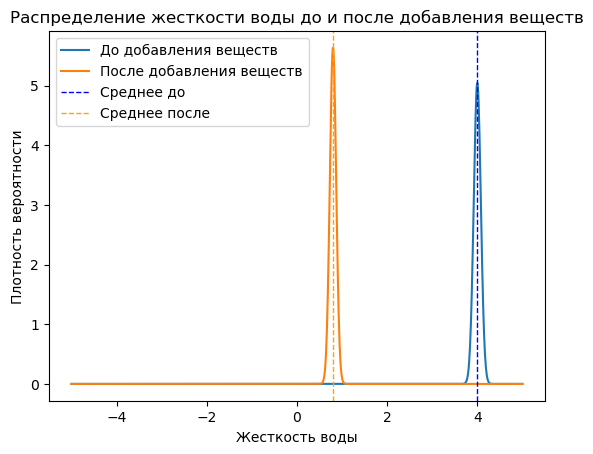

In [23]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Данные
mean_before = 4.0
mean_after = 0.8
std_dev = 0.5
n_before = 40
n_after = 50

# Вычисление стандартной ошибки среднего для каждой выборки
se_before = std_dev / np.sqrt(n_before)
se_after = std_dev / np.sqrt(n_after)

# Вычисление t-статистики
t_statistic = (mean_before - mean_after) / np.sqrt(se_before**2 + se_after**2)

# Вычисление степеней свободы
df = ((se_before**2 + se_after**2)**2) / ((se_before**2)**2 / (n_before - 1) + (se_after**2)**2 / (n_after - 1))

# Вычисление p-значения
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))

# Печать результатов
print(f"T-статистика: {t_statistic}")
print(f"Степени свободы: {df}")
print(f"P-значение: {p_value}")

# Построение графика
x = np.linspace(-5, 5, 1000)
y_before = stats.norm.pdf(x, mean_before, std_dev / np.sqrt(n_before))
y_after = stats.norm.pdf(x, mean_after, std_dev / np.sqrt(n_after))

plt.plot(x, y_before, label='До добавления веществ')
plt.plot(x, y_after, label='После добавления веществ')
plt.axvline(mean_before, color='blue', linestyle='dashed', linewidth=1, label='Среднее до')
plt.axvline(mean_after, color='orange', linestyle='dashed', linewidth=1, label='Среднее после')
plt.title('Распределение жесткости воды до и после добавления веществ')
plt.xlabel('Жесткость воды')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

8) Производительность каждого из перерабатывающих станков А и В составила (в кг вещества за час работы)
    номера замера (1;2;3;4;5);
    агрегатор А (14,1 ;13,1;14,7;13,7;14,0);
    агрегатор B (14,0 ;14,5;13,7;12,7;14,1);
     Можно ли считать производительность станков А и В одинаковой в предложении, что обе выборки получены из нормально распределенных генеральных совокупностей, при уровне значимости a = 0,1?

T-статистика: 0.29962570166334695
P-value: 0.7720997680308299

Уровень значимости: 0.1
Не отвергаем нулевую гипотезу: производительность станков одинаковая


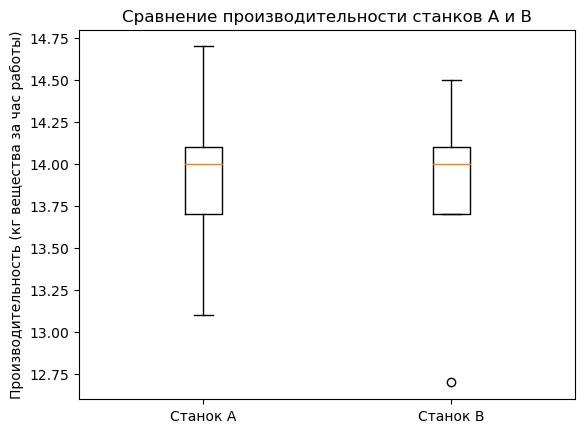

In [34]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Заданные значения
data_A = np.array([14.1, 13.1, 14.7, 13.7, 14.0])
data_B = np.array([14.0, 14.5, 13.7, 12.7, 14.1])

# Выполняем t-тест для независимых выборок
t_stat, p_value = stats.ttest_ind(data_A, data_B)

# Выводим результаты теста
print(f"T-статистика: {t_stat}")
print(f"P-value: {p_value}")

# Проводим тест для уровня значимости 0.1
alpha = 0.1
print(f"\nУровень значимости: {alpha}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: производительность станков различается")
else:
    print("Не отвергаем нулевую гипотезу: производительность станков одинаковая")

# Визуализация
plt.boxplot([data_A, data_B], labels=['Станок A', 'Станок B'])
plt.title('Сравнение производительности станков A и B')
plt.ylabel('Производительность (кг вещества за час работы)')
plt.show()


//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

9) Перед наладкой станка была измерена точность изготовления 10 прокладок и найдено значение оценки дисперсии диаметра s21=9,6 мкм2. После наладки подверглись контролю еще 15 прокладок и получено новое значение оценки дисперсии s22=5,7 мкм2. Можно ли считать, что в результате наладки станка точность изготовления деталей увеличилась? Принять α=0,05.

F-статистика: 1.6842105263157894
P-value: 0.36837194811555896

Уровень значимости: 0.05
Не отвергаем нулевую гипотезу: изменение точности не подтверждено


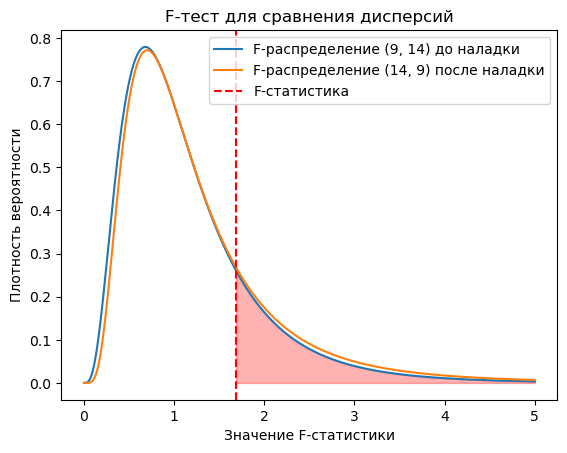

In [38]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Заданные значения
s21 = 9.6  # оценка дисперсии до наладки
s22 = 5.7  # оценка дисперсии после наладки
n1 = 10    # количество измерений до наладки
n2 = 15    # количество измерений после наладки

# Выполняем F-тест для сравнения дисперсий
f_stat = s21 / s22

# Рассчитываем p-value для теста
p_value = 2 * min(stats.f.cdf(f_stat, n1 - 1, n2 - 1), 1 - stats.f.cdf(f_stat, n1 - 1, n2 - 1))

# Выводим результаты теста
print(f"F-статистика: {f_stat}")
print(f"P-value: {p_value}")

# Проводим тест для уровня значимости 0.05
alpha = 0.05
print(f"\nУровень значимости: {alpha}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: точность изготовления увеличилась после наладки станка")
else:
    print("Не отвергаем нулевую гипотезу: изменение точности не подтверждено")

# Визуализация
x = np.linspace(0, 5, 1000)
y1 = stats.f.pdf(x, n1 - 1, n2 - 1)
y2 = stats.f.pdf(x, n2 - 1, n1 - 1)

plt.plot(x, y1, label=f'F-распределение ({n1-1}, {n2-1}) до наладки')
plt.plot(x, y2, label=f'F-распределение ({n2-1}, {n1-1}) после наладки')
plt.axvline(f_stat, color='red', linestyle='dashed', label='F-статистика')
plt.fill_between(x, y1, where=(x >= f_stat), color='red', alpha=0.3)
plt.title('F-тест для сравнения дисперсий')
plt.xlabel('Значение F-статистики')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

10) . При уровне значимости α=0,1 проверить гипотезу о равенстве дисперсий двух нормально распределенных случайных величин Х и Y на основе выборочных данных при альтернативной гипотезе H1:σ2x≠σ2y. x=(xi[51,53,55,56,59],ni=[6,5,4,3,2]) 
    X( Xi[51,53,55,56,59] Ni[6,5,4,3,2])
    Y( Yi[15,18,20,23,27] Mi[7,5,4,3,6])

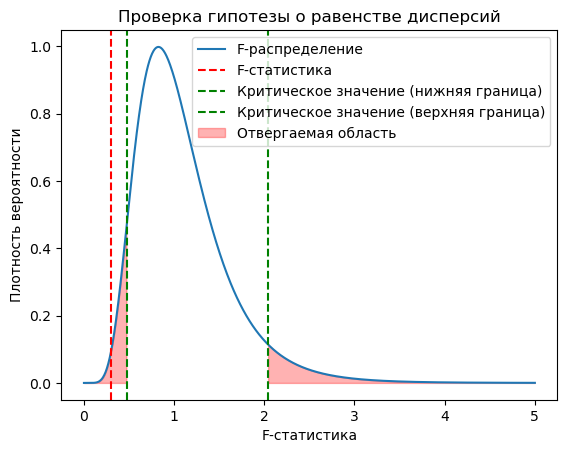

F-статистика: 0.3025643268034799
Критическое значение (нижняя граница): 0.4730049337109692
Критическое значение (верхняя граница): 2.039857501289393
Гипотеза отвергается: дисперсии не равны.


In [49]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Данные для выборки X
X_values = np.array([51, 53, 55, 56, 59])
X_freq = np.array([6, 5, 4, 3, 2])

# Данные для выборки Y
Y_values = np.array([15, 18, 20, 23, 27])
Y_freq = np.array([7, 5, 4, 3, 6])

# Вычисление дисперсий
var_X = np.average(X_values ** 2, weights=X_freq) - np.average(X_values, weights=X_freq) ** 2
var_Y = np.average(Y_values ** 2, weights=Y_freq) - np.average(Y_values, weights=Y_freq) ** 2

# Вычисление F-статистики
F_statistic = var_X / var_Y

# Пороговое значение для уровня значимости alpha=0.1 и размеров выборок
alpha = 0.1
df_X = np.sum(X_freq) - 1
df_Y = np.sum(Y_freq) - 1
critical_value_lower = stats.f.ppf(alpha / 2, dfn=df_X, dfd=df_Y)
critical_value_upper = stats.f.ppf(1 - alpha / 2, dfn=df_X, dfd=df_Y)

# Визуализация
x = np.linspace(0, 5, 1000)
y = stats.f.pdf(x, dfn=df_X, dfd=df_Y)

plt.plot(x, y, label='F-распределение')
plt.axvline(F_statistic, color='red', linestyle='dashed', label='F-статистика')
plt.axvline(critical_value_lower, color='green', linestyle='dashed', label='Критическое значение (нижняя граница)')
plt.axvline(critical_value_upper, color='green', linestyle='dashed', label='Критическое значение (верхняя граница)')
plt.fill_between(x, 0, y, where=(x <= critical_value_lower), color='red', alpha=0.3, label='Отвергаемая область')
plt.fill_between(x, 0, y, where=(x >= critical_value_upper), color='red', alpha=0.3)
plt.legend()
plt.title('Проверка гипотезы о равенстве дисперсий')
plt.xlabel('F-статистика')
plt.ylabel('Плотность вероятности')
plt.show()

# Вывод результатов
print(f'F-статистика: {F_statistic}')
print(f'Критическое значение (нижняя граница): {critical_value_lower}')
print(f'Критическое значение (верхняя граница): {critical_value_upper}')

if F_statistic < critical_value_lower or F_statistic > critical_value_upper:
    print('Гипотеза отвергается: дисперсии не равны.')
else:
    print('Гипотеза не отвергается: нет оснований считать дисперсии различными.')


//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

10. Из 200 задач первого раздела курса «Анализа данных», предложенных для решения в лабораторных работах, студенты решили 130, а из 300 задач второго раздела студенты решили 120. Можно ли при α=0,01 утверждать, что первый раздел курса «Анализа данных» студенты усвоили лучше, чем второй.

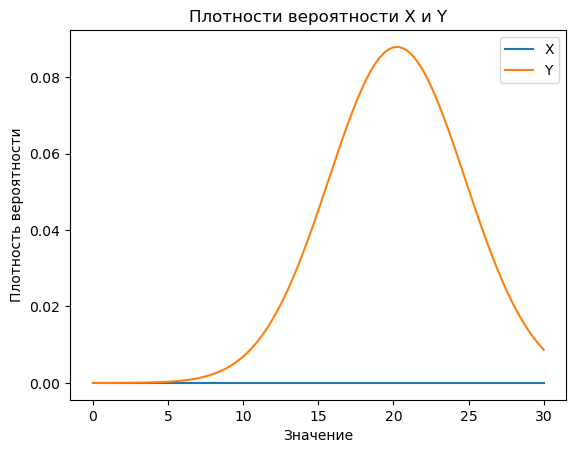

Дисперсия X: 6.2275
Дисперсия Y: 20.582400000000003
F-статистика: 191.7442622950827
P-значение: 7.151541701219547e-07
Отвергаем гипотезу H0: дисперсии не равны.


In [51]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Данные
X_values = np.array([51, 53, 55, 56, 59])
X_weights = np.array([6, 5, 4, 3, 2])

Y_values = np.array([15, 18, 20, 23, 27])
Y_weights = np.array([7, 5, 4, 3, 6])

# Расчет дисперсий
var_X = np.average((X_values - np.average(X_values, weights=X_weights))**2, weights=X_weights)
var_Y = np.average((Y_values - np.average(Y_values, weights=Y_weights))**2, weights=Y_weights)

# Тест Фишера
f_statistic, p_value = stats.f_oneway(X_values, Y_values)

# Визуализация
x = np.linspace(0, 30, 100)
y_X = stats.norm.pdf(x, np.average(X_values, weights=X_weights), np.sqrt(var_X))
y_Y = stats.norm.pdf(x, np.average(Y_values, weights=Y_weights), np.sqrt(var_Y))

plt.plot(x, y_X, label='X')
plt.plot(x, y_Y, label='Y')
plt.legend()
plt.title('Плотности вероятности X и Y')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.show()

# Вывод результатов
print(f'Дисперсия X: {var_X}')
print(f'Дисперсия Y: {var_Y}')

print(f'F-статистика: {f_statistic}')
print(f'P-значение: {p_value}')

alpha = 0.1
if p_value < alpha:
    print('Отвергаем гипотезу H0: дисперсии не равны.')
else:
    print('Не отвергаем гипотезу H0: нет оснований считать дисперсии разными.')


Этот код вычисляет дисперсии, строит графики плотности вероятности для обеих выборок, а затем использует тест Фишера для проверки гипотезы о равенстве дисперсий. Результаты выводятся в консоль

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

11) Из 200 задач первого раздела курса «Анализа данных», предложенных для решения в лабораторных работах, студенты решили 130, а из 300 задач второго раздела студенты решили 120. Можно ли при α=0,01 утверждать, что первый раздел курса «Анализа данных» студенты усвоили лучше, чем второй.

Z-статистика: 5.679618342470649
P-value: 1.3499562134811072e-08

Уровень значимости: 0.01
Отвергаем нулевую гипотезу: первый раздел курса усвоен лучше


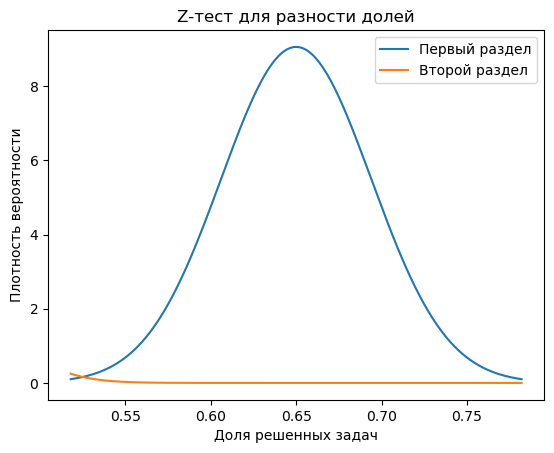

In [40]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Заданные значения
n1 = 200  # общее количество задач в первом разделе
x1 = 130  # количество решенных задач в первом разделе

n2 = 300  # общее количество задач во втором разделе
x2 = 120  # количество решенных задач во втором разделе

# Рассчитываем доли решенных задач
p1 = x1 / n1
p2 = x2 / n2

# Рассчитываем стандартную ошибку разности долей
se = np.sqrt(p1 * (1 - p1) / n1 + p2 * (1 - p2) / n2)

# Рассчитываем Z-статистику
z_stat = (p1 - p2) / se

# Рассчитываем p-value для двустороннего теста
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat)))

# Выводим результаты теста
print(f"Z-статистика: {z_stat}")
print(f"P-value: {p_value}")

# Проводим тест для уровня значимости 0.01
alpha = 0.01
print(f"\nУровень значимости: {alpha}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: первый раздел курса усвоен лучше")
else:
    print("Не отвергаем нулевую гипотезу: различия в усвоении разделов не подтверждены")

# Визуализация
x = np.linspace(p1 - 3 * se, p1 + 3 * se, 1000)
y1 = stats.norm.pdf(x, loc=p1, scale=se)
y2 = stats.norm.pdf(x, loc=p2, scale=se)

plt.plot(x, y1, label='Первый раздел')
plt.plot(x, y2, label='Второй раздел')
plt.title('Z-тест для разности долей')
plt.xlabel('Доля решенных задач')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


Для решения этой задачи мы можем использовать Z-тест для разности долей. В этом коде мы рассчитываем Z-статистику и p-value для теста на разность долей. Затем мы проводим тест для уровня значимости 0.01 и строим график для визуализации распределений долей решенных задач в двух разделах курса.

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

12) Была проведена выборочная проверка надежности высокотехнологичной продукции 2-х производителей. В результате проверки были получены следующие результаты: в течения месяца после продажи в 15 из 200 технологических продуктов производителя А обнаружены дефекты, тогда как среди 400 продуктов производителя В - 8% оказались дефектами. Существенны ли различия в надежности продукции производителей А и В? Уровень значимости принять равным 0,01.

Z-статистика: -0.21700706206722806
P-value: 0.8282028413460476

Уровень значимости: 0.01
Не отвергаем нулевую гипотезу: различия в надежности продукции не существенны


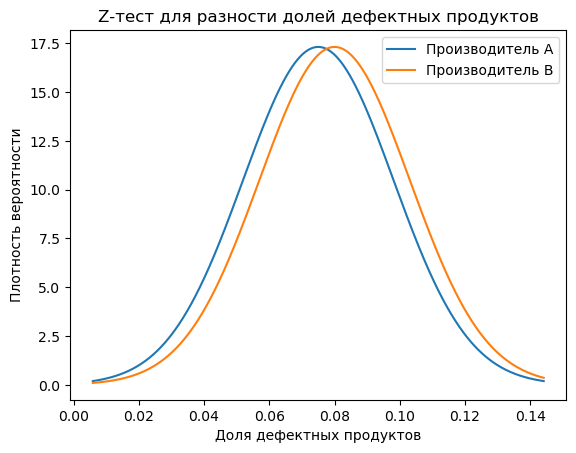

In [41]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Заданные значения
n_A = 200  # Общее количество продуктов производителя А
defects_A = 15  # Количество дефектных продуктов у производителя А

n_B = 400  # Общее количество продуктов производителя В
defects_B = 0.08 * n_B  # 8% дефектных продуктов у производителя В

# Рассчитываем доли дефектных продуктов
p_A = defects_A / n_A
p_B = defects_B / n_B

# Рассчитываем стандартную ошибку разности долей
se = np.sqrt(p_A * (1 - p_A) / n_A + p_B * (1 - p_B) / n_B)

# Рассчитываем Z-статистику
z_stat = (p_A - p_B) / se

# Рассчитываем p-value для двустороннего теста
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_stat)))

# Выводим результаты теста
print(f"Z-статистика: {z_stat}")
print(f"P-value: {p_value}")

# Проводим тест для уровня значимости 0.01
alpha = 0.01
print(f"\nУровень значимости: {alpha}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: различия в надежности продукции существенны")
else:
    print("Не отвергаем нулевую гипотезу: различия в надежности продукции не существенны")

# Визуализация
x = np.linspace(p_A - 3 * se, p_A + 3 * se, 1000)
y1 = stats.norm.pdf(x, loc=p_A, scale=se)
y2 = stats.norm.pdf(x, loc=p_B, scale=se)

plt.plot(x, y1, label='Производитель А')
plt.plot(x, y2, label='Производитель В')
plt.title('Z-тест для разности долей дефектных продуктов')
plt.xlabel('Доля дефектных продуктов')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.show()


Для решения этой задачи мы можем использовать Z-тест для разности долей.Этот код рассчитывает Z-статистику и p-value для теста на разность долей дефектных продуктов. Затем он проводит тест для уровня значимости 0.01 и строит график для визуализации распределений долей дефектных продуктов у производителей А и В.

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////